# SoC zu Beginn

In diesem Notebook wird die Auswirkung des SoC zu Beginn des Ladeprozesses auf den Lastverlauf untersucht.
In den bisherigen Simulationen wurde immer ein SoC von 0 angenommen, was natürlich unrealistisch ist. Da die EVs bei einem niedrigeren SoC eine höhere Ladeleistung zulassen (siehe Ladekurven), besteht die Vermutung, dass die Lastspitzen insgesamt geringer ausfallen, wenn EVs mit einem höheren SoC den Ladevorgang starten.
Als Parkdauer wird weiterhin die Weibull-Verteilung mit den zuvor ermittelten Parametern verwendet

Zunächst wird eine randomisierte **Gleichverteilung** des SoC angenommen. Dafür wird in den Settings angegeben, in welchem Bereich der SoC in % zu Beginn liegen soll. Dann wird über diesen Bereich für jedes ankommende EV ein Wert in diesem Bereich zufällig bestimmt.


soc_begin:  equally_distributed , 50
soc_begin:  equally_distributed , 72
soc_begin:  equally_distributed , 22
soc_begin:  equally_distributed , 13
soc_begin:  equally_distributed , 7
Alle Ladesäulen belegt. Abgewiesene EVs:  1
'Tesla_Model_3_LR' charged. Anzahl geladener EVs: 1
'VW_ID3_Pure' charged. Anzahl geladener EVs: 2
soc_begin:  equally_distributed , 32
'VW_ID3_Pure' charged. Anzahl geladener EVs: 3
soc_begin:  equally_distributed , 74
'VW_ID3_Pure' charged. Anzahl geladener EVs: 4
'Porsche_Taycan' charged. Anzahl geladener EVs: 5
soc_begin:  equally_distributed , 23
'Porsche_Taycan' charged. Anzahl geladener EVs: 6
soc_begin:  equally_distributed , 4
soc_begin:  equally_distributed , 51
soc_begin:  equally_distributed , 10
'Tesla_Model_S-X_LR' charged. Anzahl geladener EVs: 7
'VW_ID3_Pure' charged. Anzahl geladener EVs: 8
soc_begin:  equally_distributed , 19
'FIAT_500e_Hatchback_2021' charged. Anzahl geladener EVs: 9
'Porsche_Taycan' charged. Anzahl geladener EVs: 10
soc_begin

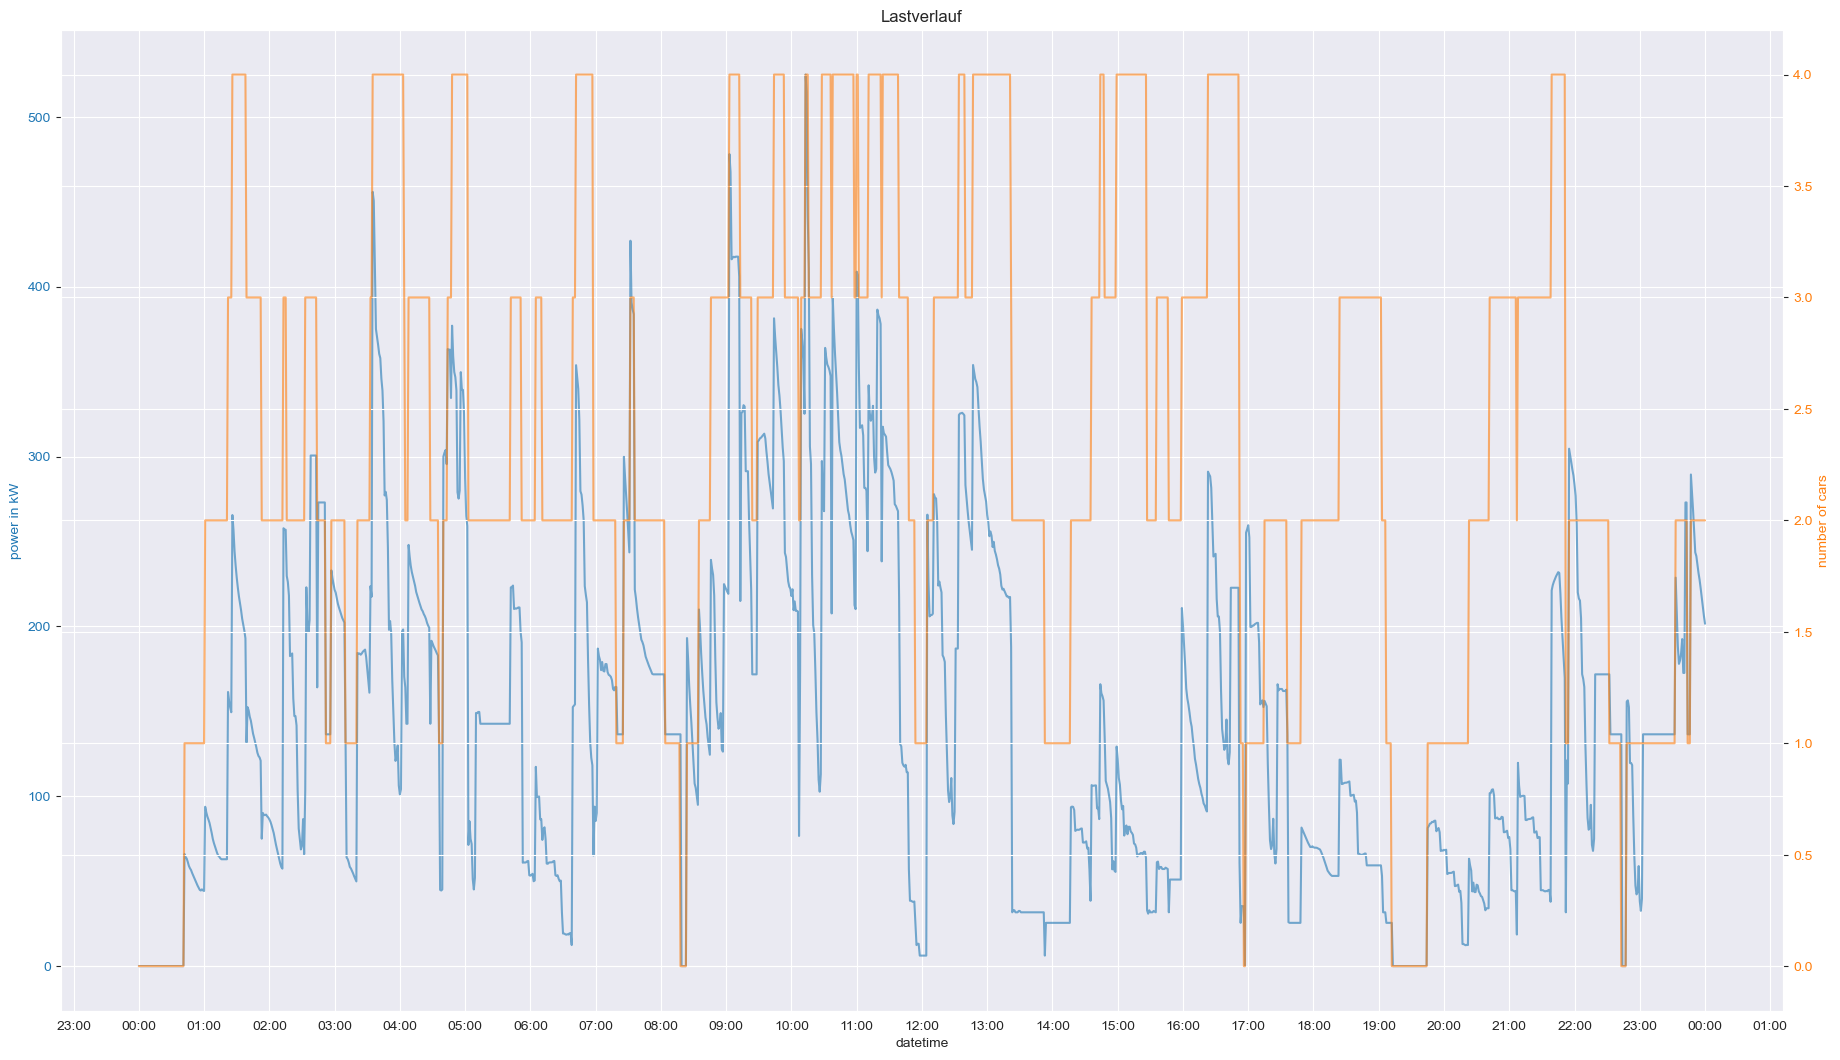

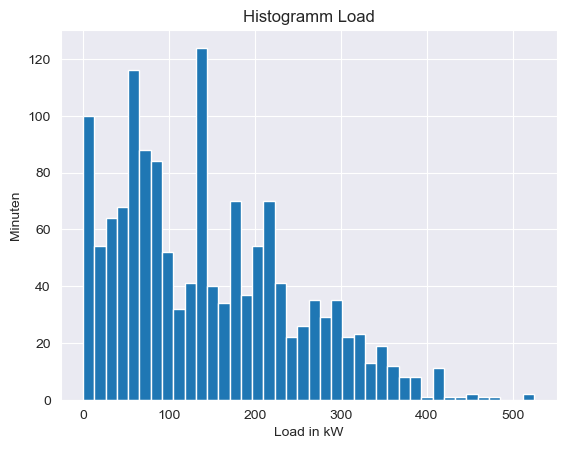

,power_per_minute,number_cars_charging
count,1441.000000,1441.000000
mean,144.696415,2.328938
std,103.062031,1.140201
min,0.000000,0.000000
25%,60.427046,2.000000
50%,136.476868,2.000000
75%,216.147649,3.000000
max,524.829690,4.000000


In [46]:
import importlib
import numpy as np
import model_v2
importlib.reload(model_v2)

df_results_returned_equally_distributed = model_v2.simulation("settings_soc_begin.json")

# soc_begin_global = "equally_distributed"

model_v2.plot(df_results_returned_equally_distributed)
df_results_returned_equally_distributed.describe()

<AxesSubplot:xlabel='power_per_minute', ylabel='Proportion'>

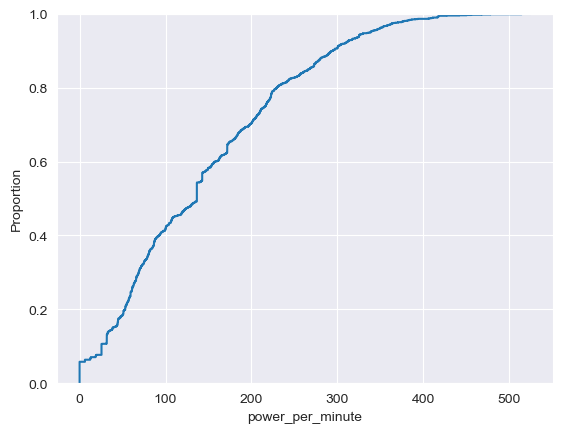

In [84]:
import seaborn as sns
# sns.displot(np.asarray(df_results_returned_equally_distributed['power_per_minute']), kind="ecdf")
sns.ecdfplot(data=df_results_returned_equally_distributed, x="power_per_minute")

In [128]:
importlib.reload(model_v2)
model_v2.auswertung(df_results_returned_equally_distributed)

Maximale Last:  524.8296898830706 kWh
Minuten über 60% der maximalen Last (314.90 kWh): 103 Entsprechen  7.15 %
Minuten über 70% der maximalen Last (367.38 kWh): 36 Entsprechen  2.50 %
Minuten über 80% der maximalen Last (419.86 kWh): 8 Entsprechen  0.56 %
Minuten über 90% der maximalen Last (472.35 kWh): 3 Entsprechen  0.21 %
Minuten über 95% der maximalen Last (498.59 kWh): 2 Entsprechen  0.14 %


# Gauss

Als Nächstes wird eine Gauss-Verteilung für den SoC zu Beginn des Ladevorgangs verwendet.


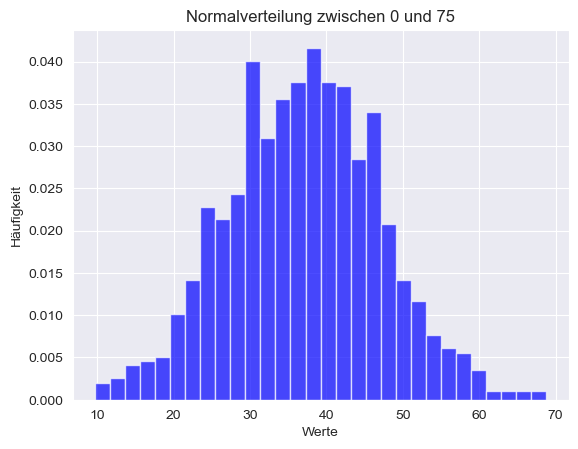

In [48]:
import matplotlib.pyplot as plt

# Normalverteilung
mu = 37.5  # Mittelwert (Halbwegs zwischen 0 und 75)
sigma = 10  # Standardabweichung

# Erzeugen einer Liste von Zufallszahlen mit normaler Verteilung
data = np.random.normal(mu, sigma, 1000)

# Begrenzen der Werte auf den Bereich von 0 bis 75
data = np.clip(data, 0, 75)

# Plot
plt.hist(data, bins=30, density=True, alpha=0.7, color='b')

# Zeigen Sie das Diagramm an
plt.title('Normalverteilung zwischen 0 und 75')
plt.xlabel('Werte')
plt.ylabel('Häufigkeit')
plt.show()


soc_begin:  gauss , [49.30575812]
soc_begin:  gauss , [45.22088372]
soc_begin:  gauss , [39.37989635]
'VW_ID3_Pure' charged. Anzahl geladener EVs: 1
soc_begin:  gauss , [23.74725849]
'Porsche_Taycan' charged. Anzahl geladener EVs: 2
'Tesla_Model_3_LR' charged. Anzahl geladener EVs: 3
soc_begin:  gauss , [31.1035989]
'Porsche_Taycan' charged. Anzahl geladener EVs: 4
soc_begin:  gauss , [34.45817963]
soc_begin:  gauss , [24.6533507]
'Tesla_Model_S-X_LR' charged. Anzahl geladener EVs: 5
'Porsche_Taycan' charged. Anzahl geladener EVs: 6
soc_begin:  gauss , [42.5579035]
soc_begin:  gauss , [56.74102139]
soc_begin:  gauss , [53.19437421]
soc_begin:  gauss , [35.88013155]
Alle Ladesäulen belegt. Abgewiesene EVs:  1
soc_begin:  gauss , [55.89657334]
Alle Ladesäulen belegt. Abgewiesene EVs:  2
soc_begin:  gauss , [37.80184735]
Alle Ladesäulen belegt. Abgewiesene EVs:  3
'Tesla_Model_S-X_LR' charged. Anzahl geladener EVs: 7
'FIAT_500e_Hatchback_2021' charged. Anzahl geladener EVs: 8
'Tesla_Model

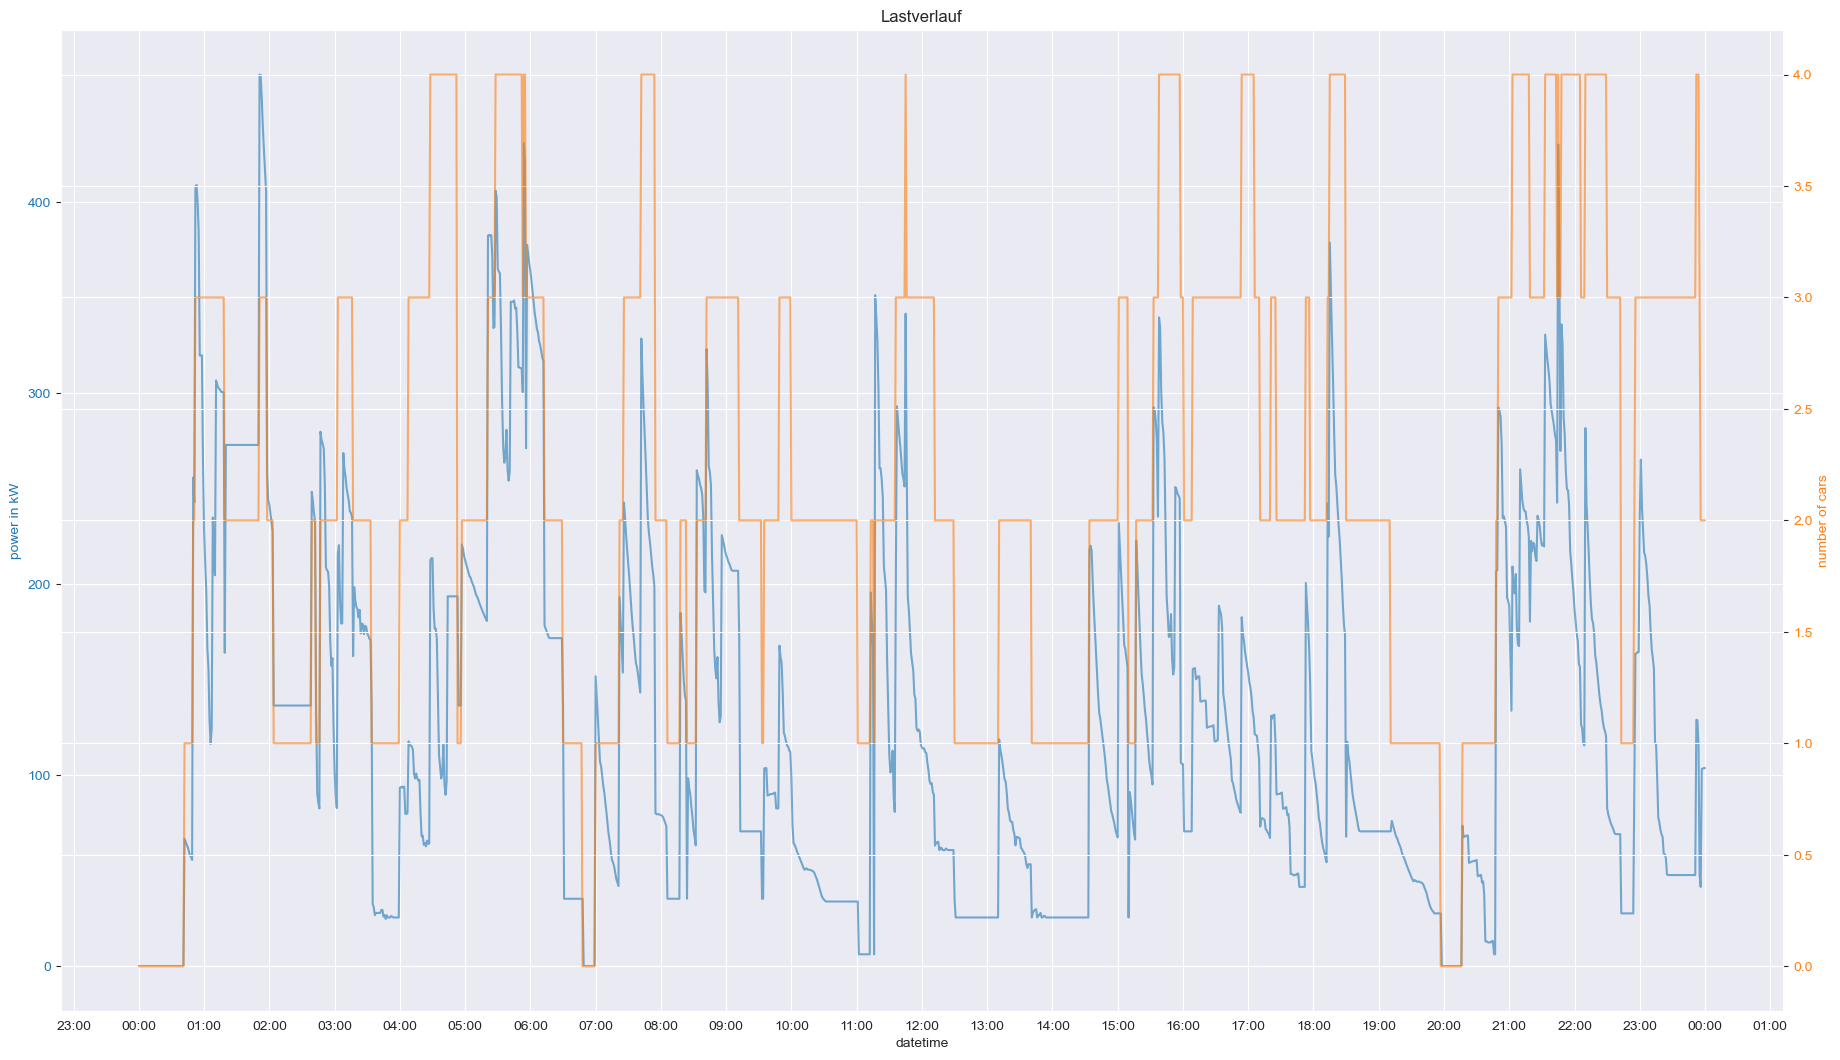

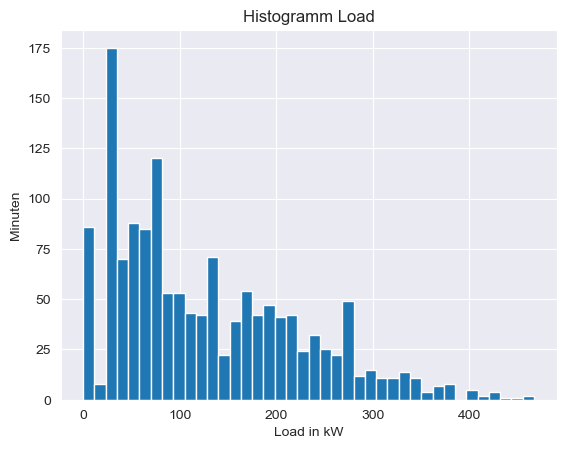

,power_per_minute,number_cars_charging
count,1441.000000,1441.000000
mean,127.608489,2.166551
std,97.580472,1.084624
min,0.000000,0.000000
25%,47.708300,1.000000
50%,101.265866,2.000000
75%,193.655262,3.000000
max,466.892379,4.000000


In [49]:
importlib.reload(model_v2)

df_results_returned_gauss = model_v2.simulation("settings_soc_begin.json")
model_v2.plot(df_results_returned_gauss)

<AxesSubplot:xlabel='power_per_minute', ylabel='Proportion'>

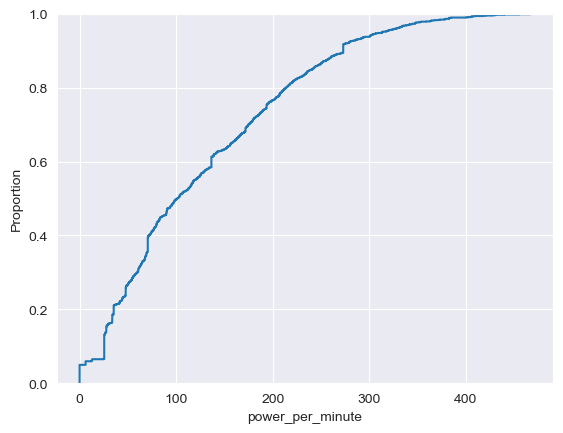

In [50]:
# sns.displot(np.asarray(df_results_returned_gauss['power_per_minute']), kind="ecdf")
sns.ecdfplot(data=df_results_returned_gauss, x="power_per_minute")

Anteil der Minuten, die über einem bestimmten prozentualen Wert der Maximallast liegen

In [127]:
importlib.reload(model_v2)
model_v2.auswertung(df_results_returned_gauss)
df_results_returned_gauss.describe(percentiles=[.5,.75,.9,.95,.98,1])

Maximale Last:  466.89237908030526 kWh
Minuten über 60% der maximalen Last (280.14 kWh): 108 Entsprechen  7.49 %
Minuten über 70% der maximalen Last (326.82 kWh): 59 Entsprechen  4.09 %
Minuten über 80% der maximalen Last (373.51 kWh): 23 Entsprechen  1.60 %
Minuten über 90% der maximalen Last (420.20 kWh): 8 Entsprechen  0.56 %
Minuten über 95% der maximalen Last (443.55 kWh): 3 Entsprechen  0.21 %


,power_per_minute,number_cars_charging
count,1441.000000,1441.000000
mean,127.608489,2.166551
std,97.580472,1.084624
min,0.000000,0.000000
50%,101.265866,2.000000
75%,193.655262,3.000000
90%,272.953737,4.000000
95%,313.166544,4.000000
98%,362.883580,4.000000
100%,466.892379,4.000000


# "Worst-Case" (SOC = 0)

In der folgenden Simulation wird der SOC zu Beginn auf 0 gesetzt. Dies sollte die größten Lastspitzen generieren.

soc_begin:  0 , 0
soc_begin:  0 , 0
soc_begin:  0 , 0
soc_begin:  0 , 0
'FIAT_500e_Hatchback_2021' charged. Anzahl geladener EVs: 1
'Porsche_Taycan' charged. Anzahl geladener EVs: 2
'Tesla_Model_3_LR' charged. Anzahl geladener EVs: 3
soc_begin:  0 , 0
soc_begin:  0 , 0
'VW_ID3_Pure' charged. Anzahl geladener EVs: 4
soc_begin:  0 , 0
soc_begin:  0 , 0
'VW_ID3_Pure' charged. Anzahl geladener EVs: 5
'Tesla_Model_S-X_LR' charged. Anzahl geladener EVs: 6
soc_begin:  0 , 0
soc_begin:  0 , 0
'FIAT_500e_Hatchback_2021' charged. Anzahl geladener EVs: 7
'Tesla_Model_3_LR' charged. Anzahl geladener EVs: 8
soc_begin:  0 , 0
'FIAT_500e_Hatchback_2021' charged. Anzahl geladener EVs: 9
soc_begin:  0 , 0
'FIAT_500e_Hatchback_2021' charged. Anzahl geladener EVs: 10
soc_begin:  0 , 0
'Porsche_Taycan' charged. Anzahl geladener EVs: 11
'Tesla_Model_3_LR' charged. Anzahl geladener EVs: 12
soc_begin:  0 , 0
'Tesla_Model_3_LR' charged. Anzahl geladener EVs: 13
soc_begin:  0 , 0
soc_begin:  0 , 0
'FIAT_500e_H

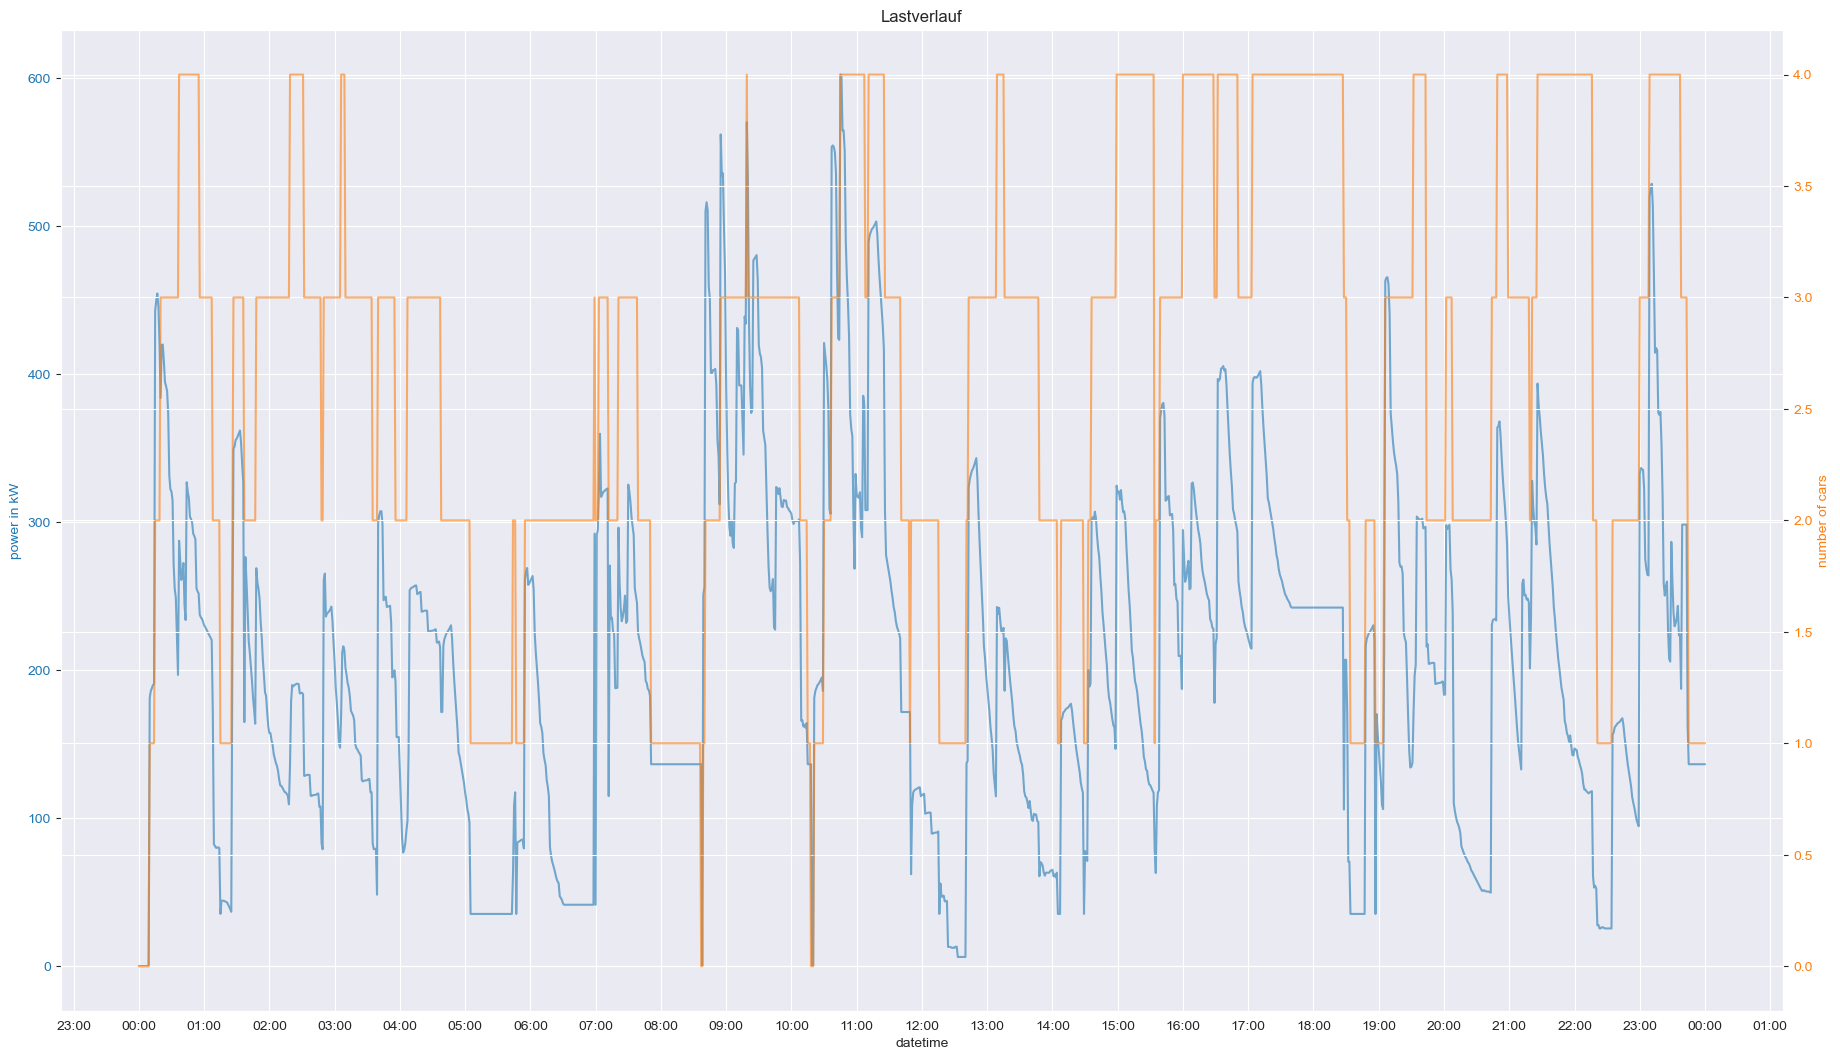

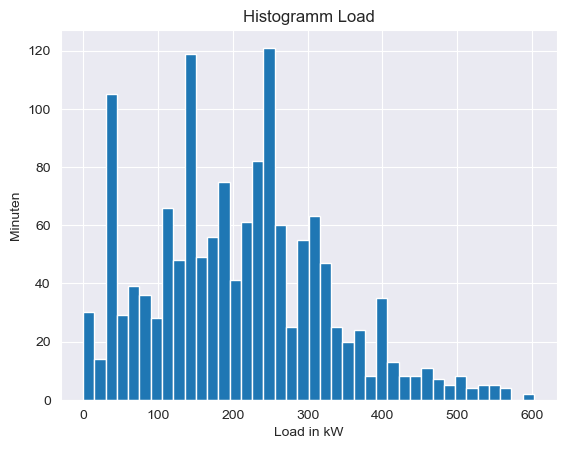

In [76]:
importlib.reload(model_v2)

df_results_returned_SOC_empty = model_v2.simulation("settings_soc_begin.json")
model_v2.plot(df_results_returned_SOC_empty)

In [124]:
importlib.reload(model_v2)
model_v2.auswertung(df_results_returned_SOC_empty)

Maximale Last:  602.6265760387826 kWh
Minuten über 60% der maximalen Last (361.58 kWh): 147 Entsprechen 10.20 %
Minuten über 70% der maximalen Last (421.84 kWh): 67 Entsprechen  4.65 %
Minuten über 80% der maximalen Last (482.10 kWh): 33 Entsprechen  2.29 %
Minuten über 90% der maximalen Last (542.36 kWh): 11 Entsprechen  0.76 %
Minuten über 95% der maximalen Last (572.50 kWh): 2 Entsprechen  0.14 %


# Vergleich der verschiedenen SOCs

Nun werden alle 3 Methoden für den SOC zu Beginn miteinander vergleichen:

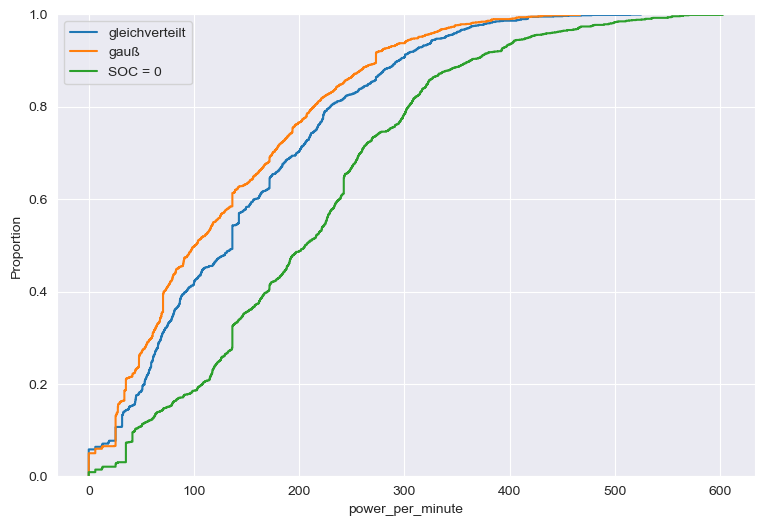

In [77]:
plt.figure(figsize=(9, 6))

sns.ecdfplot(data=df_results_returned_equally_distributed, x="power_per_minute", label="gleichverteilt")
sns.ecdfplot(data=df_results_returned_gauss, x="power_per_minute", label = "gauß")
sns.ecdfplot(data=df_results_returned_SOC_empty, x="power_per_minute", label = "SOC = 0")

plt.legend()
plt.show()